## Rainfall Prediction Using Linear Regression

Author: Rizwan Rizwan (MSc., B.E(Mechanical))

In [7]:
# import the libraries 
import pandas as pd
import numpy as np
import sklearn as sk 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# load the dataset 
df=pd.read_csv('austin_weather.csv')
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [3]:
# drop (delete) the unnessary column in the data
df=df.drop(['Date','Events','SeaLevelPressureHighInches','SeaLevelPressureLowInches'],axis=1)

In [5]:
df = df.replace('T', 0.0)
df = df.replace('-', 0)
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16,0.0


In [6]:
# save the cleaned data in csv file with name austin_final
df.to_csv('austin_final.csv')

In [16]:
df = pd.read_csv('austin_final.csv')

In [17]:
X= df.drop(['PrecipitationSumInches'], axis=1)
y=df['PrecipitationSumInches']
y=y.values.reshape(-1, 1)

In [18]:
df.columns

Index(['Unnamed: 0', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

In [20]:
day_index=798
days = [i for i in range(y.size)]

# Call the model 
model = LinearRegression()

# Train/fit the model 
model.fit(X, y)
input= np.array([[74], [69], [45], [67], [49], [43], [33], [45],
                 [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

input=input.reshape(1, -1)

# print the output
print('The precipitation in inches for the input is:', model.predict(input))

The precipitation in inches for the input is: [[1.54799628]]


c:\Users\Tesla Laptops\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precepitation trend graph: 


Text(0, 0.5, 'Precipitation in inches')

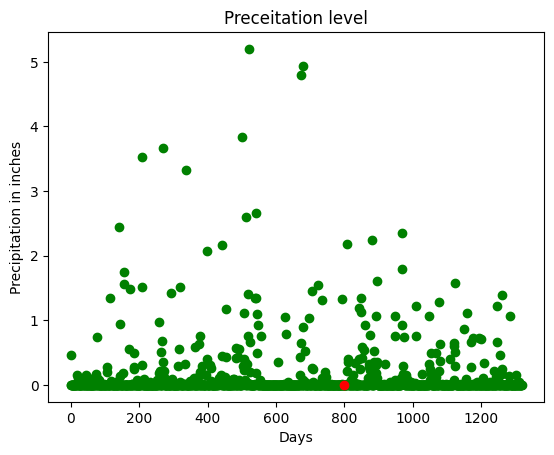

In [24]:
print('The precepitation trend graph: ')
plt.scatter(days, y, color='g')
plt.scatter(days[day_index], y[day_index], color='r')
plt.title('Preceitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

Precepitation Vs Selected Attributes Graph:


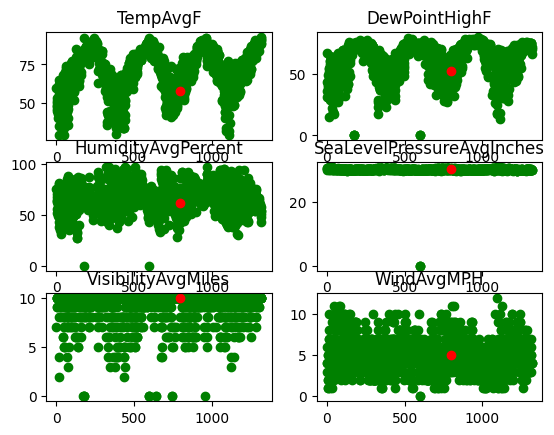

In [31]:
X_f=X.filter(['TempAvgF', 'DewPointHighF',
       'HumidityAvgPercent','SeaLevelPressureAvgInches',
        'VisibilityAvgMiles','WindAvgMPH'], axis=1)
print('Precepitation Vs Selected Attributes Graph:')
for i in range(X_f.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, X_f[X_f.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], X_f[X_f.columns.values[i]][day_index], color='r')

    plt.title(X_f.columns.values[i])